1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many local minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import basinhopping
from mpl_toolkits import mplot3d

%matplotlib inline
plt.style.use('default')

Solution: f([ 0.08984201 -0.71265641]) = -1.03163
Solution: f([-0.08984201  0.71265641]) = -1.03163
Solution: f([-0.08984202  0.7126564 ]) = -1.03163


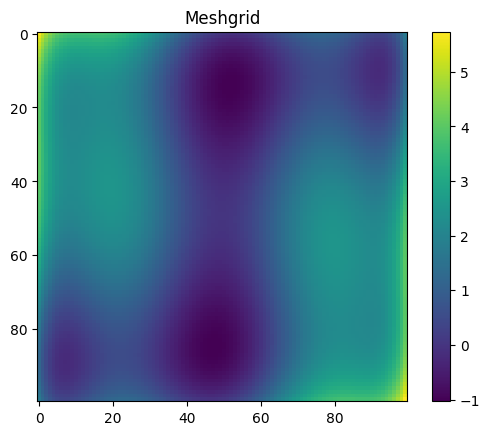

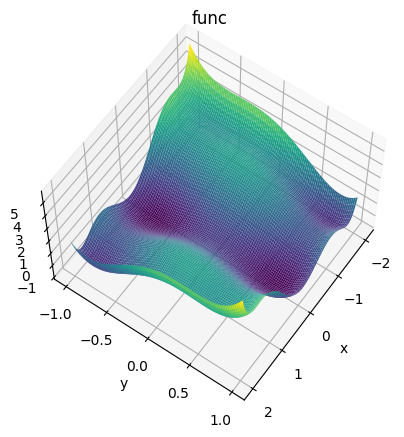

In [2]:
#the function
def func(params):
    x,y = params
    return (4-2.1*x**2+(x**4/3))*x**2+x*y+(4*y**2-4)*y**2

#we restrict -2<x<2 and -1<y<1
x = np.linspace(-2,2,100)
y = np.linspace(-1,1,100)

#use numpy.meshgrid() to visually find the regions
X, Y = np.meshgrid(x,y)
Z = func([X, Y])
plt.figure()
plt.imshow(Z, origin='upper')
plt.title('Meshgrid')
plt.colorbar()

#we can see two regions where the data is darker (-1)
#Around x = 0 and y = -0.65 and y = 0.62 

#plot the function in 3D
plt.figure()
ax = plt.axes(projection='3d')
#we change the point of view to better sew the minimums
ax.view_init(60, 35)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                       cmap='viridis', edgecolor='none')
ax.set_title('func');

#find the global minima : [0, -0.6] and [0, 0.6]
#but they have the same values (-1.03163) so it is like one global minima
#Therefore, we can say that the global minima is at -1.03163 (we can find this global minima with two different value of x and y)
#to find the global minima, we need to search with two different first values 
#these two "global" minima are the local minima of the function

#The first local minimum
x0 = [0, -0.6]
result = basinhopping(func, x0, stepsize=0.1)
# evaluate solution
solution = result['x']
evaluation = func(solution)
print('Solution: f(%s) = %.5f' % (solution, evaluation))

#The second local minimum
x0 = [0, 0.6]
result = basinhopping(func, x0, stepsize=0.1)
# evaluate solution
solution = result['x']
evaluation = func(solution)
print('Solution: f(%s) = %.5f' % (solution, evaluation))

#As said before, the two local minima have the same value -1.03163, we can say that the global minima is at -1.03161
#and can be find with two different values of x and y (two different local minima)

#Initial guess at (0,0)
#the outcome is either the first local minimum or the second local minima
#because the guess is close to both local minima, the function basinhopping don't know which local minima to choose
x0 = [0, 0]
result = basinhopping(func, x0, stepsize=0.1)
# evaluate solution
solution = result['x']
evaluation = func(solution)
print('Solution: f(%s) = %.5f' % (solution, evaluation))

2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with odeint over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - *Optional*: determine if there is a set of parameters for which the motion is chaotic.

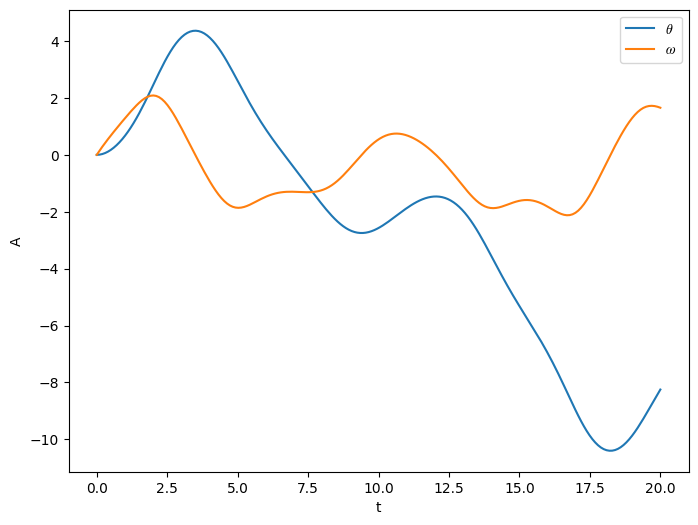

In [3]:
from scipy.integrate import odeint
import math

def derivative(X, time, Q, d, bigO):
    return(X[1], (-1/Q)*X[1]+math.sin(X[0])+d*math.cos(bigO*time))

Xinit = [0,0]
Q = 2.0
d = 1.5
bigO = 0.65

#A period of 200 time steps
t = np.linspace(0,20,200)
X = odeint(derivative, Xinit, t, args=(Q, d, bigO))

# plot 𝜃 and 𝜔 
plt.figure(figsize=(8, 6))
plt.plot(t, X[:, 0], label="$𝜃$")
plt.plot(t, X[:, 1], label="$𝜔$")
plt.xlabel('t')
plt.ylabel('A')
plt.legend(loc='best')


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

Text(0, 0.5, 'Amplitude')

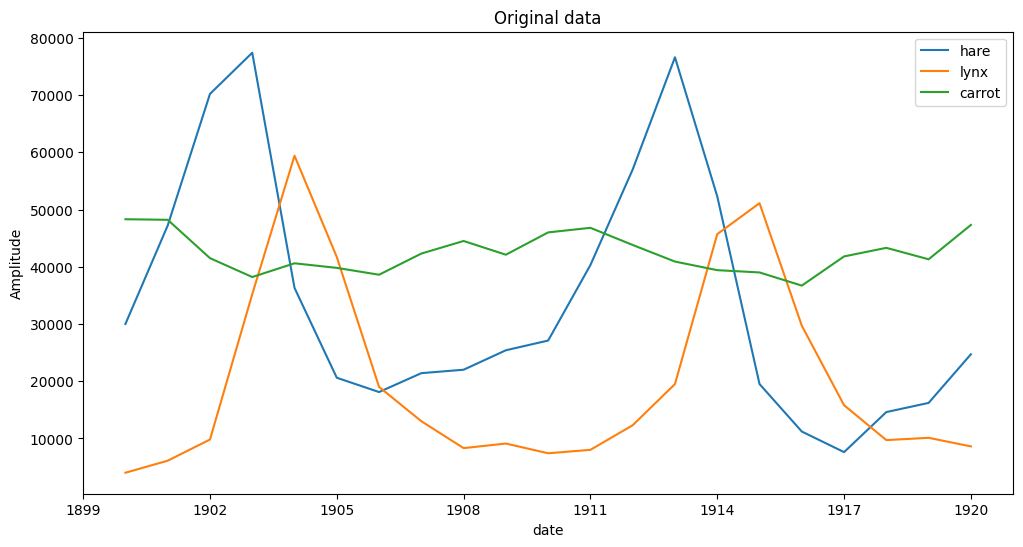

In [4]:
from scipy import fftpack
import pandas as pd
from matplotlib.ticker import MaxNLocator

df = pd.read_csv('data/populations.txt', delimiter = "\t")
fig = plt.figure(figsize=(12, 6))

#VALUES
date = df['# year'].values
sig_hare = df['hare'].values
sig_lynx = df['lynx'].values
sig_carrot = df['carrot'].values

time_step = 1

#Plot original signal
plt.plot(date, sig_hare, label='hare')
plt.plot(date, sig_lynx, label='lynx')
plt.plot(date, sig_carrot, label = 'carrot')
plt.legend(loc='best')
plt.title('Original data')
ax = fig.axes[0]
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel('date')
ax.set_ylabel('Amplitude')

In [5]:
def peak_frequency(population):
    # The FFT of the signal and the power
    sig_fft = fftpack.fft(population)
    
    #the weights of the Fourier components for each discrete frequency interval
    power = np.abs(sig_fft)
    
    #the corresponding frequencies
    sample_freq = fftpack.fftfreq(sig_fft.size, d=1)
    
    #We need to find the peak frequency to then determine the period which is 1/f
    pos_mask = np.where(sample_freq > 0)
    freqs = sample_freq[pos_mask]
    powes = power[pos_mask]
    
    #We can find the period by identifying the peak frequency
    peak_freq = freqs[powes.argmax()]
    return peak_freq


#freq
peak_freq_hare = peak_frequency(sig_hare)
peak_freq_lynx = peak_frequency(sig_lynx)
peak_freq_carrot = peak_frequency(sig_carrot)

#Periode of the signals
period_hare = 1/peak_freq_hare
period_lynx = 1/peak_freq_lynx
period_carrot = 1/peak_freq_carrot

print("Period of the haure : ", period_hare)
print("Period of the lynx : ", period_lynx)
print("Period of the carrot : ", period_carrot)

Period of the haure :  10.5
Period of the lynx :  10.5
Period of the carrot :  10.5


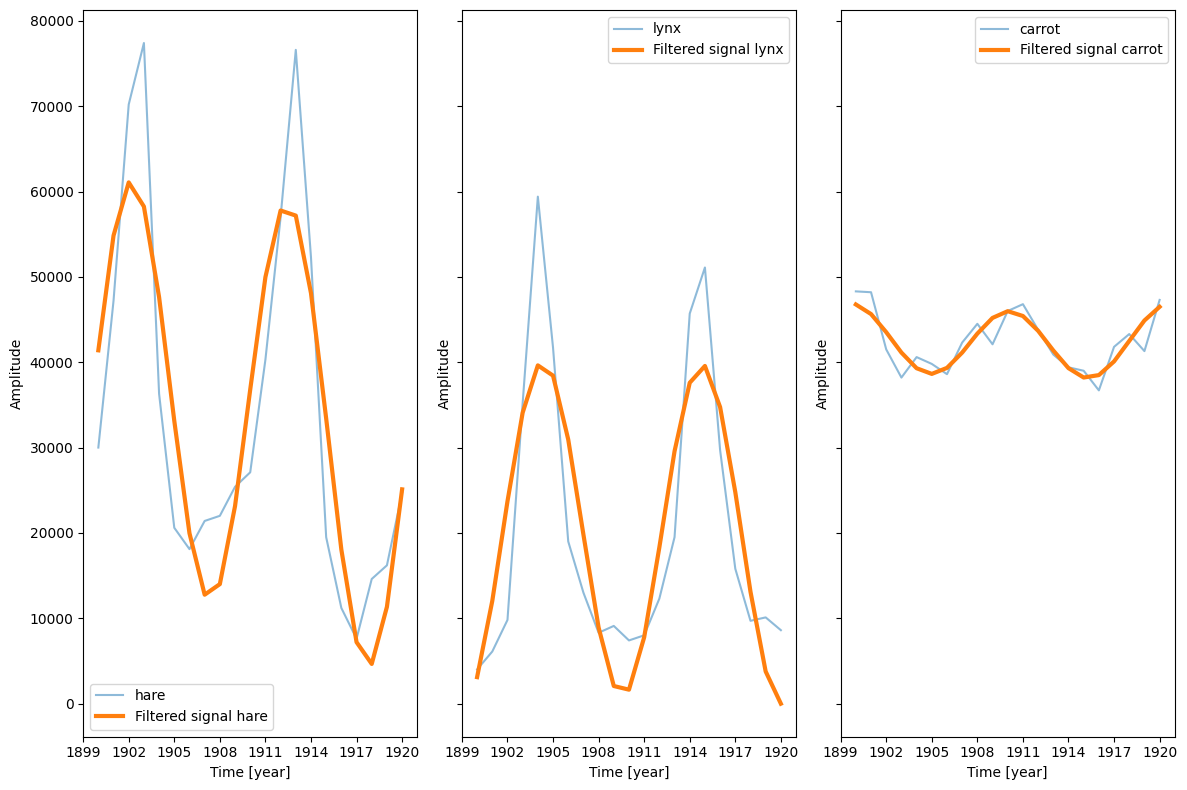

In [6]:
#We can also return the periodic signal 

#now we want to create a filter that removes the random noise and returns the periodic signal
def periodic_signal(sig):
    sig_fft = fftpack.fft(sig)
    high_freq_fft = sig_fft.copy()
    # filter (set to zero) all high frequency components that are larger than peak_freq
    high_freq_fft[np.abs(fftpack.fftfreq(sig.size, d=1)) - peak_frequency(sig) > 0] = 0
    # calculate the Inverse Fast Fourier Transform
    filtered_sig = np.real(fftpack.ifft(high_freq_fft))
    return filtered_sig



fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(12, 8))
ax1.plot(date, sig_hare, alpha=0.5, label='hare')
ax1.plot(date, periodic_signal(sig_hare), linewidth=3, label='Filtered signal hare')
ax1.set_xlabel('Time [year]')
ax1.set_ylabel('Amplitude')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.legend(loc='best')
ax2.plot(date, sig_lynx, alpha=0.5, label='lynx')
ax2.plot(date, periodic_signal(sig_lynx), linewidth=3, label='Filtered signal lynx')
ax2.set_xlabel('Time [year]')
ax2.set_ylabel('Amplitude')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.legend(loc='best')
ax3.plot(date, sig_carrot, alpha=0.5, label='carrot')
ax3.plot(date, periodic_signal(sig_carrot), linewidth=3, label='Filtered signal carrot')
ax3.set_xlabel('Time [year]')
ax3.set_ylabel('Amplitude')
ax3.xaxis.set_major_locator(MaxNLocator(integer=True))
ax3.legend(loc='best')

fig.tight_layout()

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

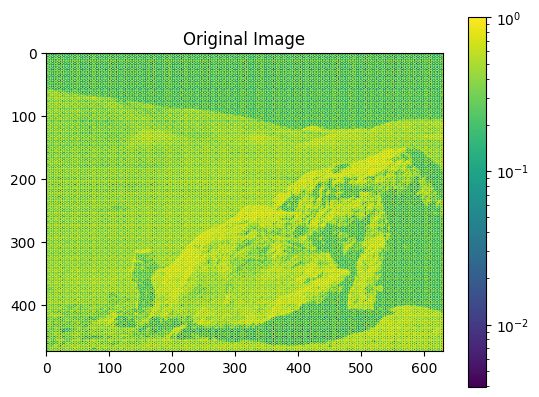

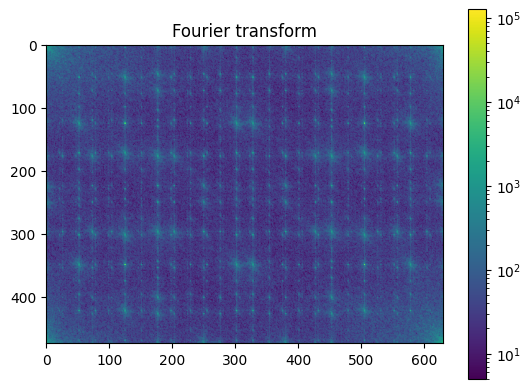

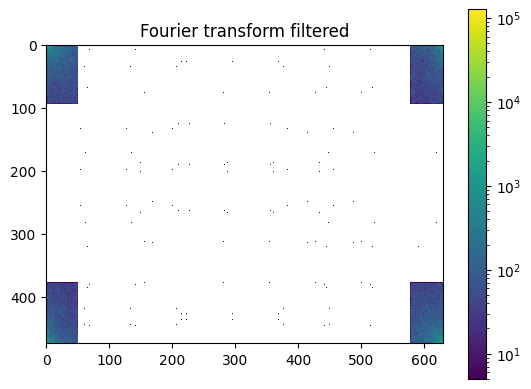

<Figure size 800x600 with 0 Axes>

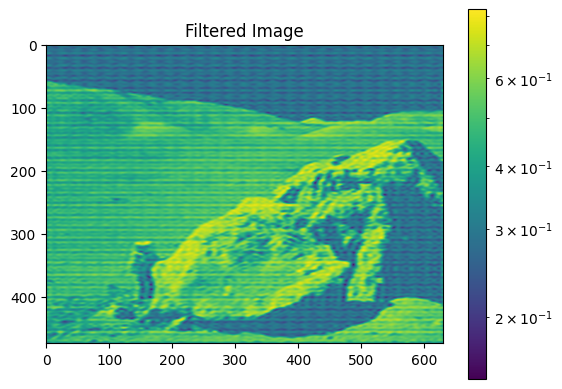

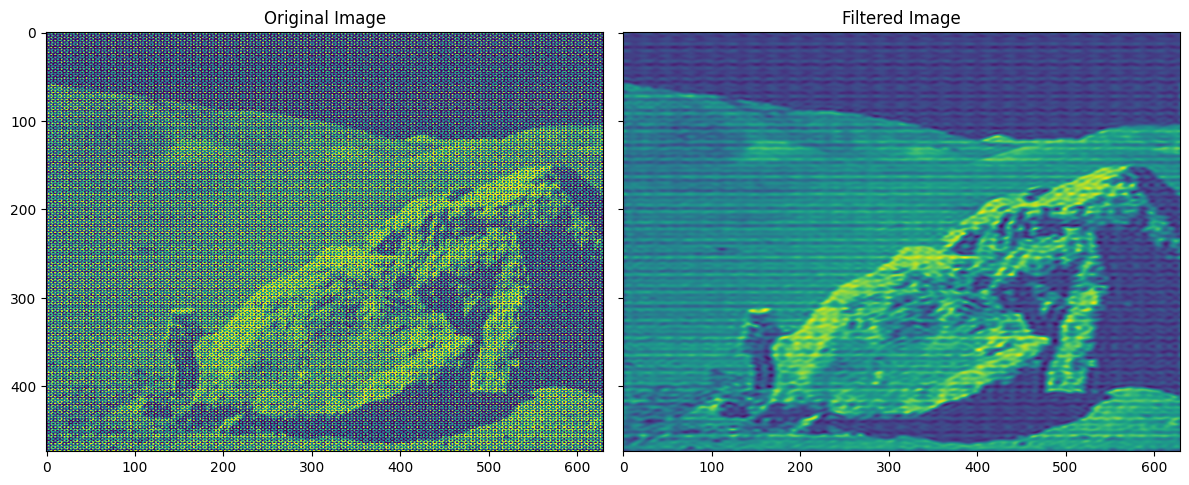

In [7]:
from matplotlib.colors import LogNorm
from scipy.fftpack import fft2

#importing the image as a 2D numpy array
image = plt.imread("images/moonlanding.png")
#examine the image
fig, ax = plt.subplots()
#vmin and vmax are initialized from the minimum and maximum value
shw = ax.imshow(image, norm=LogNorm())
bar = plt.colorbar(shw)
plt.title('Original Image')
plt.show()

#compute the 2-D discrete Fourier
sig_ftt_2d = fft2(image)
power = np.abs(sig_ftt_2d)

plt.figure()
plt.imshow(power, norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Fourier transform')

#We can see that in each corner of the Fourier transform figure, we have some light which corresponds to the signal
#the rest of the Fourier transform is populated by periodic lights which corresponds to the periodic noise. 
#Therefore, we only need to keep the corners of the Fourier transform to reduce the noise

#Set the noise regions to zero
image_fft2 = sig_ftt_2d.copy() # create an explicit copy of the FFT
r, c = image_fft2.shape # rows, columns

#we only keep the corner of the Fourier transform that are not populated by noise
image_fft2[int(r*0.20):int(0.80*r),:] = 0
image_fft2[:,int(c*0.08):int(0.92*c)] = 0

#We can verify that we filtered the fourier transform and we have no more noises
plt.figure()
plt.imshow(np.abs(image_fft2), norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Fourier transform filtered')

#Apply the inverse Fourier transform to plot the resulting image.
filtered_sig = fftpack.ifft2(image_fft2)

# only take the real part
real_filtered_signal = np.real(filtered_sig)

# plot the result of the IFFT
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
#vmin and vmax are initialized from the minimum and maximum value
shw = ax.imshow(real_filtered_signal, norm=LogNorm())
bar = plt.colorbar(shw)
plt.title('Filtered Image')
plt.show()

#The final result 
fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(12, 8))
ax1.imshow(image)
ax1.set_title("Original Image")
ax2.imshow(real_filtered_signal)
ax2.set_title("Filtered Image")
fig.tight_layout()